<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/01_KMeans_Clustering_project_to_target_the_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 348 (delta 20), reused 0 (delta 0), pack-reused 307
Receiving objects: 100% (348/348), 91.03 KiB | 3.96 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [3]:
%cd my_methods
!ls

/content/my_methods
choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      README.md
my_backward_propagation.py	      sgd_neural_net.py
my_cap_curve.py			      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from choose_optimal_number_of_clusters import choose_optimal_number_of_clusters

# DataPreprocessing

In [5]:
df = pd.read_csv('https://bit.ly/2FToHMJ')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**now we are choosing 2 columns only for better visualisation**

In [6]:
X = df.iloc[:, [3, 4]].values
X[:2]

array([[15, 39],
       [15, 81]])

# choosing optimal number of clusters in dataset
**by minimizing the WCSS (within-cluster sums of squares) and after apply elbow method and chose the no. of cluster where the decrease in WCSS is very less as compare to previous WCSS**

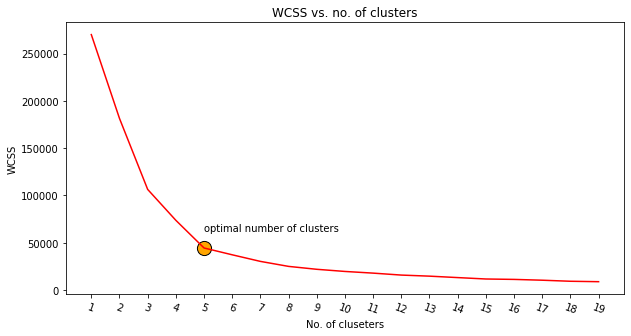

(5, 44448.45544793371)

In [7]:
choose_optimal_number_of_clusters(X, slope_threshold = .3, max_clusters = 20, step_size = 1)

**by elbow method we can see that optimal number of clusters are 5 because after this their is less decrease in WCSS**

In [0]:
optimal_clusters = 5

# Run model on optimal number of clusters

In [9]:
model = KMeans(n_clusters = optimal_clusters, n_init = 10)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## predict the cluster's of every Features

In [10]:
y_label = model.fit_predict(X)
y_label

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

### Unique clusters

In [11]:
pd.Series(y_label).unique()

array([4, 1, 0, 2, 3])

## Visualise

In [12]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [0]:
import seaborn as sns

In [0]:
sns.set_style('whitegrid')

In [0]:
def visualise_2d_dataset(model = None, x = None, optimal_clusters = None):
  if not model:
    if not optimal_clusters:
      raise ValueError('Please Provide the number of optimal Clusters')
    else:
      model = KMeans(n_clusters = optimal_clusters, n_init = 10)
      model.fit(x)
  if model:
      y_label = model.fit_predict(x)
      plt.figure(figsize = (10, 7))
      plt.scatter(X[:, 0], X[:, 1], c = y_label, cmap = 'coolwarm', edgecolors = 'black', linewidths = 1, alpha = 1, s = 150)
      plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 300, c = 'red', label = 'Centroids', edgecolors = 'black', alpha = .7)
      plt.title(f'Visualisation of {optimal_clusters} clusters')
      plt.xlabel('Annual Income (k$)',fontsize =  'large')
      plt.ylabel('Spending Score (1 - 100)',fontsize =  'large')
      plt.legend(bbox_to_anchor = (1.2, 1))
      plt.show()

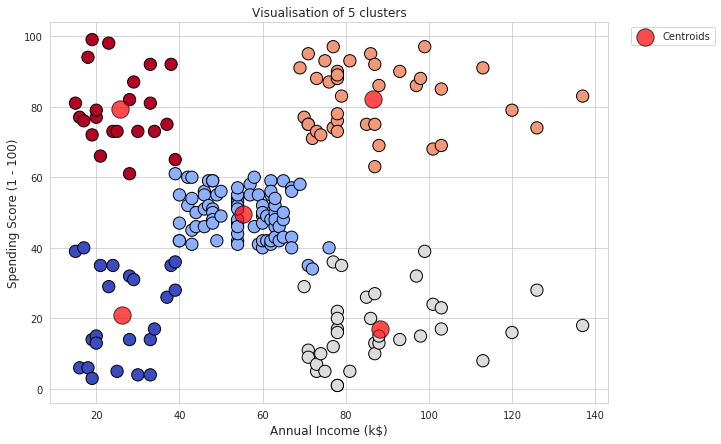

In [16]:
visualise_2d_dataset(optimal_clusters = 5, x = X)

# Conclustion of Project

**By visualising this graph we can conclude that is**
- cluster 1 (**lower left**) having **Low Income, Low Spending**                  ------->**Sensible Customers**
-  cluster 2 (**lower right**) having **High Income, Low Spending**  ------>**Careful Customers**
-  cluster 3 (**Center**) having **Medium Income, Medium Spending**------>**Standard Customers**
-  cluster4 (**Upper Left**) having **Low income, High Spending**             ------>**Carless Customers**
-  
cluster 5 (**Upper Right**) having **High Income, High Spending**------>**Target Customers**

#KMeans fit_trasnform

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data, centers = make_blobs(n_samples = 300, n_features = 2, centers = 2, random_state = 0)
data[:2]

array([[3.35941485, 5.24826681],
       [2.93110028, 0.78255619]])

In [0]:
data.shape

(300, 2)

In [0]:
train_data = data[:250]
train_data.shape

(250, 2)

In [0]:
test_data = data[250:]
test_data.shape

(50, 2)

In [0]:
#fit transform features
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
model = KMeans(2)
train_data_tf = model.fit_transform(train_data)
train_data_tf[:2]

array([[2.60514765, 4.70444391],
       [4.19417798, 1.08344741]])

In [0]:
test_data_tf = model.transform(test_data)
test_data_tf[:2]

array([[4.07722205, 2.09450898],
       [1.54581242, 5.30405262]])

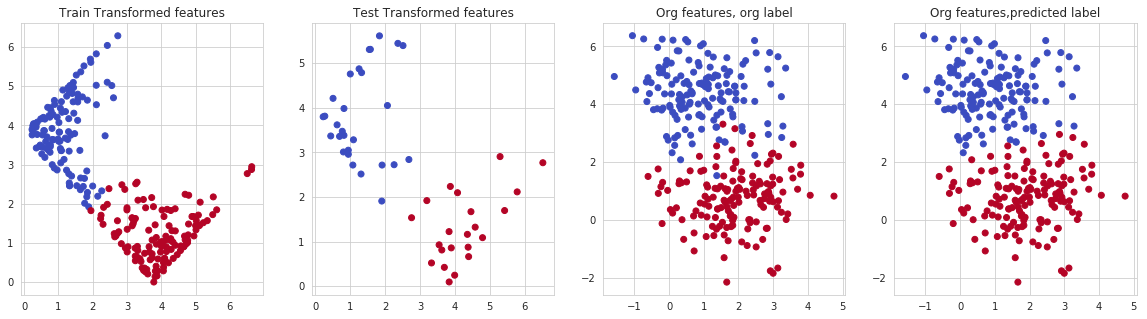

In [0]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.title('Train Transformed features')
plt.scatter(train_data_tf[:, 0], train_data_tf[: , 1], c = model.predict(train_data), cmap = 'coolwarm')
plt.subplot(1, 4, 2)
plt.title('Test Transformed features')
plt.scatter(test_data_tf[:, 0], test_data_tf[: , 1], c = model.predict(test_data), cmap = 'coolwarm')
plt.subplot(1, 4, 3)
plt.title('Org features, org label')
plt.scatter(data[:, 0], data[:, 1], c = centers, cmap = 'coolwarm')
plt.subplot(1, 4, 4)
plt.title('Org features,predicted label')
plt.scatter(data[:, 0], data[:, 1], c = KMeans(2).fit_predict(data), cmap = 'coolwarm')
plt.show()

In [0]:
from sklearn.cluster import SpectralClustering

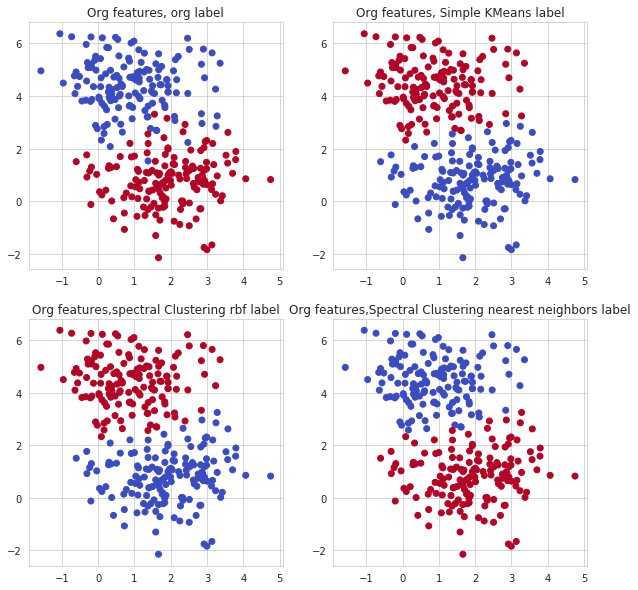

In [0]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.title('Org features, org label')
plt.scatter(data[:, 0], data[:, 1], c = centers, cmap = 'coolwarm')
plt.subplot(2, 2, 2)
plt.title('Org features, Simple KMeans label')
plt.scatter(data[:, 0], data[:, 1], c = KMeans(2).fit(data).labels_, cmap = 'coolwarm')
plt.subplot(2, 2, 3)
plt.title('Org features,spectral Clustering rbf label')
plt.scatter(data[:, 0], data[:, 1], c = SpectralClustering(2, affinity = 'rbf').fit(data).labels_, cmap = 'coolwarm')
plt.subplot(2, 2, 4)
plt.title('Org features,Spectral Clustering nearest neighbors label')
plt.scatter(data[:, 0], data[:, 1], c = SpectralClustering(2, affinity = 'nearest_neighbors').fit(data).labels_, cmap = 'coolwarm')
plt.show()

#Make Circle

In [0]:
from sklearn.datasets import make_circles

In [0]:
data, centers = make_circles(n_samples = 300, random_state = 0)

In [0]:
data[:2]

array([[-0.60559604,  0.52273648],
       [-0.01675394,  0.79982455]])

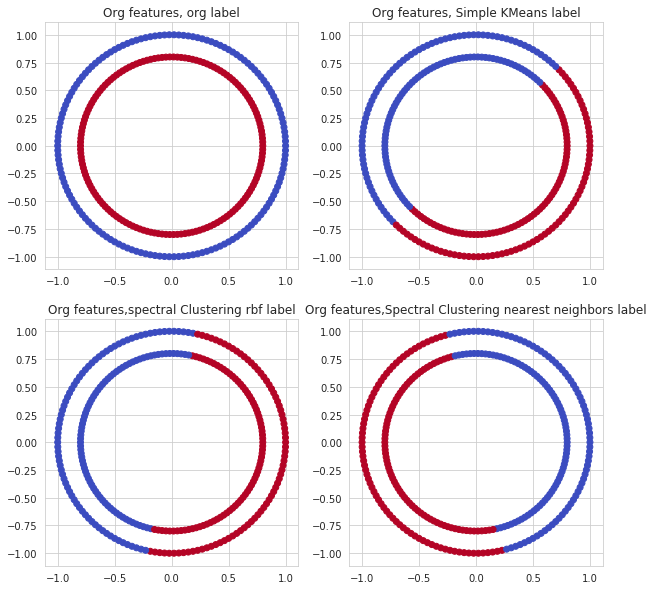

In [0]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.title('Org features, org label')
plt.scatter(data[:, 0], data[:, 1], c = centers, cmap = 'coolwarm')
plt.subplot(2, 2, 2)
plt.title('Org features, Simple KMeans label')
plt.scatter(data[:, 0], data[:, 1], c = KMeans(2).fit(data).labels_, cmap = 'coolwarm')
plt.subplot(2, 2, 3)
plt.title('Org features,spectral Clustering rbf label')
plt.scatter(data[:, 0], data[:, 1], c = SpectralClustering(2, affinity = 'rbf').fit(data).labels_, cmap = 'coolwarm')
plt.subplot(2, 2, 4)
plt.title('Org features,Spectral Clustering nearest neighbors label')
plt.scatter(data[:, 0], data[:, 1], c = SpectralClustering(2, affinity = 'nearest_neighbors').fit(data).labels_, cmap = 'coolwarm')
plt.show()

#Make Moon

In [0]:
from sklearn.datasets import make_moons

In [0]:
data, centers = make_moons(n_samples = 300, random_state = 0, noise = 0.05)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


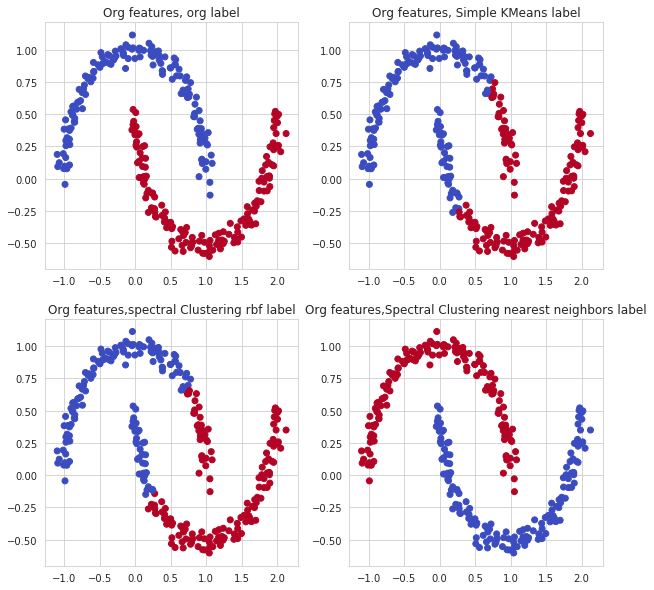

In [0]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.title('Org features, org label')
plt.scatter(data[:, 0], data[:, 1], c = centers, cmap = 'coolwarm')
plt.subplot(2, 2, 2)
plt.title('Org features, Simple KMeans label')
plt.scatter(data[:, 0], data[:, 1], c = KMeans(2).fit(data).labels_, cmap = 'coolwarm')
plt.subplot(2, 2, 3)
plt.title('Org features,spectral Clustering rbf label')
plt.scatter(data[:, 0], data[:, 1], c = SpectralClustering(2, affinity = 'rbf').fit(data).labels_, cmap = 'coolwarm')
plt.subplot(2, 2, 4)
plt.title('Org features,Spectral Clustering nearest neighbors label')
plt.scatter(data[:, 0], data[:, 1], c = SpectralClustering(2, affinity = 'nearest_neighbors').fit(data).labels_, cmap = 'coolwarm')
plt.show()